## `ARIMA Models in Python | Fitting the Future`


### `01: Fitting Prelude`
Great, you understand model order! Understanding the order is important when it comes to fitting models. You will always need to select the order of model you fit to your data, no matter what that data is.

In this exercise you will do some basic fitting. Fitting models is the next key step towards making predictions. We'll go into this more in the next chapter but let's get a head start.

Some example ARMA(1,1) data have been created and are available in your environment as y. This data could represent the amount of traffic congestion. You could use forecasts of this to suggest the efficient routes for drivers.

- Import the `ARIMA` model class from the `statsmodels.tsa.arima.model` submodule.
- Create a model object, passing it the time series `y` and the model order `(1,0,1)`. Assign this to the variable `model`.
- Use the model's `.fit()` method to fit to the data.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
y = np.loadtxt('datasets/y.txt')

In [4]:
# Import the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Instantiate the model
model = ARIMA(y, order=(1,0,1))

# Fit the model
results = model.fit()

Great work! You just fit your first ARIMA model. An ARIMA(1,0,1) model is the exact same as an ARMA(1,1) model, so this was the correct model order for this data. We'll cover this in more detail in the next chapter.



### `02: Fitting AR and MA models`
In this exercise you will fit an AR and an MA model to some data. The data here has been generated using the `arma_generate_sample()` function we used before.

You know the real AR and MA parameters used to create this data so it is a really good way to gain some confidence with ARMA models and know you are doing it right. In the next exercise you'll move onto some real world data with confidence.

There is a `pandas` DataFrame available in your environment called `sample`. It has two columns of different time series data.

In [8]:
sample = pd.read_csv("datasets/sample.csv", index_col=0)

- Fit an AR(2) model to the `'timeseries_1'` column of `sample`.
- Print a summary of the fitted model.

In [9]:
# Instantiate the model
model = ARIMA(sample['timeseries_1'], order=(2,0,0))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:           timeseries_1   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 148.655
Date:                Sat, 06 May 2023   AIC                           -289.310
Time:                        08:31:17   BIC                           -269.679
Sample:                             0   HQIC                          -281.849
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.018     -0.150      0.881      -0.037       0.032
ar.L1          0.8979      0.031     28.658      0.000       0.837       0.959
ar.L2         -0.2704      0.032     -8.561      0.0

Question
- Using the information in the summary printed, which of the following set of parameters do you think was used to generate the 'timeseries_1' data?
```
    ar_cofes = [1, -0.9, 0.3]
    ma_cofes = [1]
``` 

- Fit an MA(3) model to the 'timeseries_2' column of sample.



In [10]:
# Instantiate the model
model = ARIMA(sample['timeseries_2'], order=(0,0,3))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:           timeseries_2   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood                 148.907
Date:                Sat, 06 May 2023   AIC                           -287.813
Time:                        08:33:53   BIC                           -263.275
Sample:                             0   HQIC                          -278.487
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0018      0.012     -0.157      0.875      -0.025       0.021
ma.L1          0.1994      0.032      6.181      0.000       0.136       0.263
ma.L2          0.6359      0.025     25.434      0.0

Question
Using the information in the summary printed, which of the following set of parameters do you think was used to generate the 'timeseries_2' data?
```
    ar_cofes = [1]
    ma_cofes = [1, 0.2, 0.6, -0.1]
``` 

Correct! The fitted models had very similar AR and MA coefficient values to the real ones! You know it works!



### `03: Fitting an ARMA model`
In this exercise you will fit an ARMA model to the earthquakes dataset. You saw before that the earthquakes dataset is stationary so you don't need to transform it at all. It comes ready for modeling straight out the ground. You can remind yourself what it looks like below.

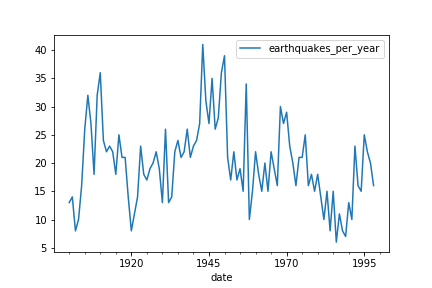

The earthquakes dataset is available in your environment as `earthquake`. The `ARIMA` class is also available in your environment.
- Instantiate an ARMA(3,1) model and pass it the earthquakes dataset.
- Fit the model.
- Print the summary of the model fit.


In [22]:
earthquake = pd.read_csv("datasets/earthquakes.csv", index_col='date', parse_dates=True)
earthquake = earthquake[['earthquakes_per_year']]

In [23]:
# Instantiate the model
model = ARIMA(earthquake, order=(3,0,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                   ARIMA(3, 0, 1)   Log Likelihood                -315.673
Date:                  Sat, 06 May 2023   AIC                            643.345
Time:                          08:44:55   BIC                            658.916
Sample:                      01-01-1900   HQIC                           649.645
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6453      2.233      8.798      0.000      15.269      24.022
ar.L1          0.5795      0.645      0.899      0.369      -0.684       1.843
ar.L2          0.0251      0.308    

c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


### `04: Fitting an ARMAX model`
In this exercise you will fit an ARMAX model to a time series which represents the wait times at an accident and emergency room for urgent medical care.

The variable you would like to model is the wait times to be seen by a medical professional wait_times_hrs. This may be related to an exogenous variable that you measured nurse_count which is the number of nurses on shift at any given time. These can be seen below.

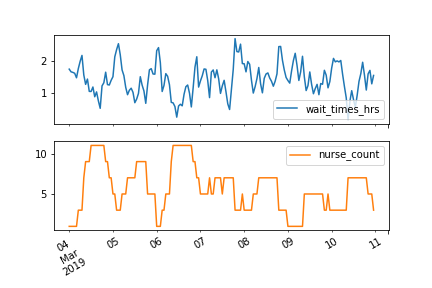


This is a particularly interesting case of time series modeling as, if the number of nurses has an effect, you could change this to affect the wait times.
The time series data is available in your environment as `hospital` and has the two columns mentioned above. The `ARMA` class is also available for you.

- Instantiate an ARMAX(2,1) model to train on the `'wait_times_hrs'` column of `hospital` using the `'nurse_count'` column as an exogenous variable.
- Fit the model.
- Print the summary of the model fit.

In [24]:
hospital = pd.read_csv("datasets/hospital.csv", index_col=0, parse_dates=True)
hospital

,wait_times_hrs,nurse_count
2019-03-04 00:00:00,1.747,1
2019-03-04 01:00:00,1.665,1
2019-03-04 02:00:00,1.647,1
2019-03-04 03:00:00,1.620,1
2019-03-04 04:00:00,1.480,1
...,...,...
2019-03-10 19:00:00,1.102,7
2019-03-10 20:00:00,1.601,5
2019-03-10 21:00:00,1.709,5
2019-03-10 22:00:00,1.293,5


In [26]:
# Instantiate the model
model = ARIMA(hospital['wait_times_hrs'], order=(2,0,1), exog=hospital['nurse_count'])

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         wait_times_hrs   No. Observations:                  168
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -11.842
Date:                Sat, 06 May 2023   AIC                             35.683
Time:                        09:03:38   BIC                             54.427
Sample:                    03-04-2019   HQIC                            43.290
                         - 03-10-2019                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1001      0.086     24.386      0.000       1.931       2.269
nurse_count    -0.1171      0.012     -9.567      0.000      -0.141      -0.093
ar.L1           0.5694      0.169      3.366    

Great work! Look back at the model parameters. What is the relation between the number of nurses on shift and the wait times? If you predicted that tomorrow was going to have long wait times how could you combat this?



### `05: Generating one-step-ahead predictions`
It is very hard to forecast stock prices. Classic economics actually tells us that this should be impossible because of market clearing.

Your task in this exercise is to attempt the impossible and predict the Amazon stock price anyway.

In this exercise you will generate one-step-ahead predictions for the stock price as well as the uncertainty of these predictions.

A model has already been fitted to the Amazon data for you. The results object from this model is available in your environment as `results`.

- Use the `results` object to make one-step-ahead predictions over the latest 30 days of data and assign the result to `one_step_forecast`.
- Assign your mean predictions to `mean_forecast` using one of the attributes of the `one_step_forecast` object.
- Extract the confidence intervals of your predictions from the `one_step_forecast` object and assign them to `confidence_intervals`.
- Print your mean predictions.

In [72]:
import numpy as np
amazon = pd.read_csv('datasets/amazon_close.csv', 
            index_col='date',
            parse_dates=True)
amazon = amazon.iloc[::-1] 


from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(amazon.loc['2018-01-01':'2019-02-08'], order=(3, 1, 3), seasonal_order=(1, 0, 1, 7),
                enforce_invertibility=False,
                enforce_stationarity=False,
                simple_differencing=False, 
                measurement_error=False,
                k_trend=0)
results = model.fit()
results.summary()

c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               close   No. Observations:                  278
Model:             SARIMAX(3, 1, 3)x(1, 0, [1], 7)   Log Likelihood               -1338.386
Date:                             Sat, 06 May 2023   AIC                           2694.772
Time:                                     10:01:29   BIC                           2727.023
Sample:                                          0   HQIC                          2707.729
                                             - 278                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1075      0.048      2.248      0.025       0.014       0.201
ar.L2          0.0526      0.039      1.362      0.173      -0.023       0.128
ar.L3         -0.8974      0.042    -21.547      0.000      -0.979      -0.816
ma.L1         -0.1202      0.039     -3.075      0.002      -0.197      -0.044
ma.L2         -0.1414      0.034     -4.141      0.000      -0.208      -0.074
ma.L3          0.9686      0.045     21.437      0.000       0.880       1.057
ar.S.L7        0.1696      0.681      0.249      0.803      -1.166       1.505
ma.S.L7       -0.2123      0.672     -0.316      0.752      -1.530       1.106
sigma2      1331.7578    108.515     12.273      0.000    1119.073    1544.443
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                21.81
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               3.10   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate  predictions
print(mean_forecast)

date
2018-12-27    1475.403803
2018-12-28    1462.744929
2018-12-31    1471.191670
2019-01-02    1498.167500
2019-01-03    1537.650659
2019-01-04    1507.937327
2019-01-07    1581.095836
2019-01-08    1627.085844
2019-01-09    1650.293692
2019-01-10    1649.502419
2019-01-11    1657.851002
2019-01-14    1647.932078
2019-01-15    1625.764201
2019-01-16    1670.943106
2019-01-17    1672.334455
2019-01-18    1683.461218
2019-01-22    1693.835230
2019-01-23    1642.444293
2019-01-24    1657.241734
2019-01-25    1652.144017
2019-01-28    1661.247168
2019-01-29    1620.866278
2019-01-30    1594.935126
2019-01-31    1679.488962
2019-02-01    1724.939881
2019-02-04    1629.052683
2019-02-05    1638.289543
2019-02-06    1647.461831
2019-02-07    1636.785990
2019-02-08    1606.561891
Name: predicted_mean, dtype: float64


### `06: Plotting one-step-ahead predictions`
Now that you have your predictions on the Amazon stock, you should plot these predictions to see how you've done.

You made predictions over the latest 30 days of data available, always forecasting just one day ahead. By evaluating these predictions you can judge how the model performs in making predictions for just the next day, where you don't know the answer.

The lower_limits, upper_limits and amazon DataFrames as well as your mean prediction mean_forecast that you created in the last exercise are available in your environment.


- Plot the `amazon` data, using the `amazon.index` as the x coordinates.
- Plot the `mean_forecast` prediction similarly, using `mean_forecast.index` as the x-coordinates.
- Plot a shaded area between `lower_limits` and `upper_limits` of your confidence interval. Use the index of `lower_limits` as the x coordinates.

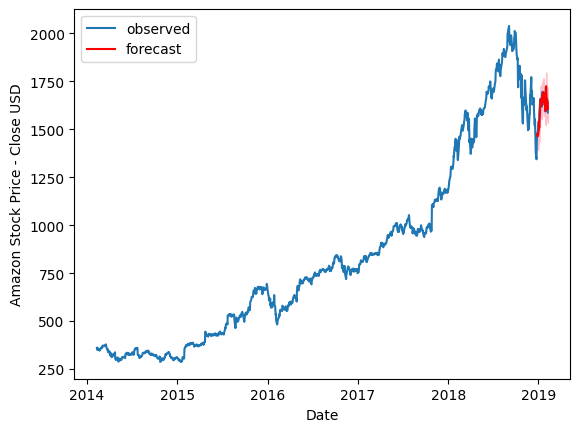

In [74]:
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(mean_forecast.index, lower_limits,
		 upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()


Great! Have a look at your plotted forecast. Is the mean prediction close to the observed values? Do the observed values lie between the upper and lower limits of your prediction?



### `07: Generating dynamic forecasts`
Now lets move a little further into the future, to dynamic predictions. What if you wanted to predict the Amazon stock price, not just for tomorrow, but for next week or next month? This is where dynamical predictions come in.

Remember that in the video you learned how it is more difficult to make precise long-term forecasts because the shock terms add up. The further into the future the predictions go, the more uncertain. This is especially true with stock data and so you will likely find that your predictions in this exercise are not as precise as those in the last exercise.

- Use the `results` object to make a dynamic predictions for the latest 30 days and assign the result to `dynamic_forecast`.
- Assign your predictions to a new variable called `mean_forecast` using one of the attributes of the `dynamic_forecast` object.
- Extract the confidence intervals of your predictions from the `dynamic_forecast` object and assign them to a new variable `confidence_intervals`.
- Print your mean predictions.

In [75]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast)

date
2018-12-27    1475.403803
2018-12-28    1476.312633
2018-12-31    1468.484345
2019-01-02    1467.287475
2019-01-03    1468.406720
2019-01-04    1478.267092
2019-01-07    1476.862277
2019-01-08    1480.025676
2019-01-09    1472.645186
2019-01-10    1469.924340
2019-01-11    1467.021746
2019-01-14    1473.609277
2019-01-15    1477.077775
2019-01-16    1479.791900
2019-01-17    1474.999286
2019-01-18    1471.717917
2019-01-22    1468.108419
2019-01-23    1471.952988
2019-01-24    1475.192346
2019-01-25    1479.061985
2019-01-28    1476.095099
2019-01-29    1473.182012
2019-01-30    1469.274663
2019-01-31    1471.267091
2019-02-01    1473.907651
2019-02-04    1477.814892
2019-02-05    1476.599644
2019-02-06    1474.287419
2019-02-07    1470.487088
2019-02-08    1471.053102
Name: predicted_mean, dtype: float64


Your dynamical predictions are dynamite! Statsmodels makes it super simple to switch between one-step ahead and dynamical predictions.



### `08: Plotting dynamic forecasts`
Time to plot your predictions. Remember that making dynamic predictions, means that your model makes predictions with no corrections, unlike the one-step-ahead predictions. This is kind of like making a forecast now for the next 30 days, and then waiting to see what happens before comparing how good your predictions were.

The lower_limits, upper_limits and amazon DataFrames as well as your mean predictions mean_forecast that you created in the last exercise are available in your environment.

- Plot the `amazon` data using the dates in the index of this DataFrame as the x coordinates and the values as the y coordinates.
- Plot the `mean_forecast` predictions similarly.
- Plot a shaded area between `lower_limits` and `upper_limits` of your confidence interval. Use the index of one of these DataFrames as the x coordinates.

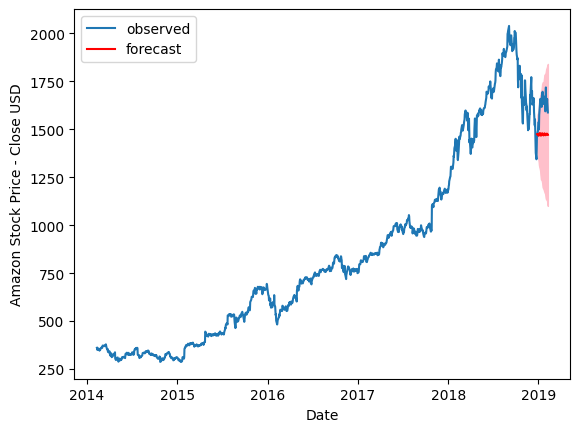

In [79]:
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(mean_forecast.index, lower_limits, 
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

Great! It is very hard to predict stock market performance and so your predictions have a wide uncertainty. However, note that the real stock data stayed within your uncertainty limits!



### `09: Differencing and fitting ARMA`
In this exercise you will fit an ARMA model to the Amazon stocks dataset. As you saw before, this is a non-stationary dataset. You will use differencing to make it stationary so that you can fit an ARMA model.

In the next section you'll make a forecast of the differences and use this to forecast the actual values.

The Amazon stock time series is available in your environment as amazon. The ARIMA model class is also available in your environment.

- Use the `.diff()` method of `amazon` to make the time series stationary by taking the first difference. Don't forget to drop the `NaN` values using the `.dropna()` method.
- Create an ARMA(2,2) model using the `ARIMA` class, passing it the stationary data.
- Fit the model.

In [80]:
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = ARIMA(amazon_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -5532.371
Date:                Sat, 06 May 2023   AIC                          11076.743
Time:                        10:18:45   BIC                          11107.566
Sample:                             0   HQIC                         11088.327
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9867      0.494      1.996      0.046       0.018       1.955
ar.L1         -0.1541      0.073     -2.119      0.034      -0.297      -0.012
ar.L2          0.7945      0.072     11.085      0.0

Great. Remember that now you have a model which you can use to predict the difference values, not the absolute value of the amazon dataset.



### `10: Unrolling ARMA forecast`
Now you will use the model that you trained in the previous exercise arma in order to forecast the absolute value of the Amazon stocks dataset. Remember that sometimes predicting the difference could be enough; will the stocks go up, or down; but sometimes the absolute value is key.

The results object from the model you trained in the last exercise is available in your environment as arma_results. The np.cumsum() function and the original DataFrame amazon are also available.

- Use the `.get_forecast()` method of the `arima_results` object and select the predicted mean of the next 10 differences.
- Use the `np.cumsum()` function to integrate your difference forecast.
- Add the last value of the original DataFrame to make your forecast an absolute value.

In [81]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]

# Print forecast
print(arma_value_forecast)

1258    1592.060529
1259    1594.209784
1260    1597.284553
1261    1598.873001
1262    1601.425849
1263    1602.649210
1264    1604.843687
1265    1605.832242
1266    1607.778202
1267    1608.618520
Name: predicted_mean, dtype: float64


c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### `11: Fitting an ARIMA model`

In this exercise you'll learn how to be lazy in time series modeling. Instead of taking the difference, modeling the difference and then integrating, you're just going to lets statsmodels do the hard work for you.

You'll repeat the same exercise that you did before, of forecasting the absolute values of the Amazon stocks dataset, but this time with an ARIMA model.

A subset of the stocks dataset is available in your environment as amazon and so is the ARIMA model class.

- Create an ARIMA(2,1,2) model, using the `ARIMA` class, passing it the Amazon stocks data `amazon`.
- Fit the model.
- Make a forecast of mean values of the Amazon data for the next 10 time steps. Assign the result to `arima_value_forecast`.

In [89]:
# Create ARIMA(2,1,2) model
arima = ARIMA(amazon, order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1259    1593.639455
1260    1601.906411
1261    1605.418925
1262    1600.976727
1263    1592.696654
1264    1588.197619
1265    1591.590210
1266    1599.721277
1267    1605.104189
1268    1602.811957
Name: predicted_mean, dtype: float64


c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Superb! You just made the same forecast you made before, but this time with an ARIMA model. Your two forecasts give the same results, but the ARIMA forecast was a lot easier to code!

### `12: Choosing ARIMA model`
You are trying to figure out which ARIMA model is the best fit for a dataset after trying different degrees of differencing and applying the Augmented Dicky-Fuller test on the differenced data. The test statistics were these:


|Order of difference:|ADF statistic|p-value|
|--------:|---------:|----------:|
|       0 |    2.198 |     0.999 |
|       1 |   -2.598 |     0.093 |
|       2 |  -14.448 |     0.000 |
|       3 |  -17.147 |     0.000 |



Which kind of ARIMA model should you fit to this time series data?

- ARIMA(p,0,q)
- ARIMA(p,1,q) 
- ARIMA(p,2,q) ✅
- ARIMA(p,3,q) 

Great answer! You want to make sure our data is stationary but don't want to over difference it either. This is the right call!
